In [2]:
import pandas as pd
import numpy as np

# 读取 CSV 文件
file_path = (
    "Transformer/pred_data/Autoformer_test_results.csv"  # 请替换为实际的 CSV 文件路径
)
data = pd.read_csv(file_path)

# 筛选真实值和预测值的列名
real_columns = [col for col in data.columns if col.startswith("real_")]
pred_columns = [col for col in data.columns if col.startswith("pred_")]

real_list = []
pred_list = []
# 提取真实值和预测值并转换为 numpy 数组
for real_col, pred_col in zip(real_columns, pred_columns):
    real_values = data[real_col].values
    pred_values = data[pred_col].values
    real_list.append(real_values)
    pred_list.append(pred_values)

real_array = np.array(real_list).reshape(-1, 24)
pred_array = np.array(pred_list).reshape(-1, 24)

FileNotFoundError: [Errno 2] No such file or directory: 'Transformer/pred_data/Autoformer_test_results.csv'

In [1]:
# 数据筛选
# 筛选条件：真实值与预测值同时大于0，且小于200000import numpy as np

# 构建筛选条件
valid_mask = (
    (real_array > 0) & (real_array < 500000) & (pred_array > 0) & (pred_array < 500000)
)

# 由于数据是成组的，我们需要按组筛选，即每组的所有元素都要满足条件
valid_group_mask = np.all(valid_mask, axis=1)

# 筛选数据
filtered_real_array = real_array[valid_group_mask]
filtered_pred_array = pred_array[valid_group_mask]

NameError: name 'real_array' is not defined

In [ ]:
filtered_real_array.shape, filtered_pred_array.shape

((44874, 24), (44874, 24))

/home/handb/.conda/envs/hztourism/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/handb/.conda/envs/hztourism/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/handb/.conda/envs/hztourism/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/handb/.conda/envs/hztourism/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/handb/.conda/envs/hztourism/lib/python3.10/site-packages/IPython/core/pylabtoo

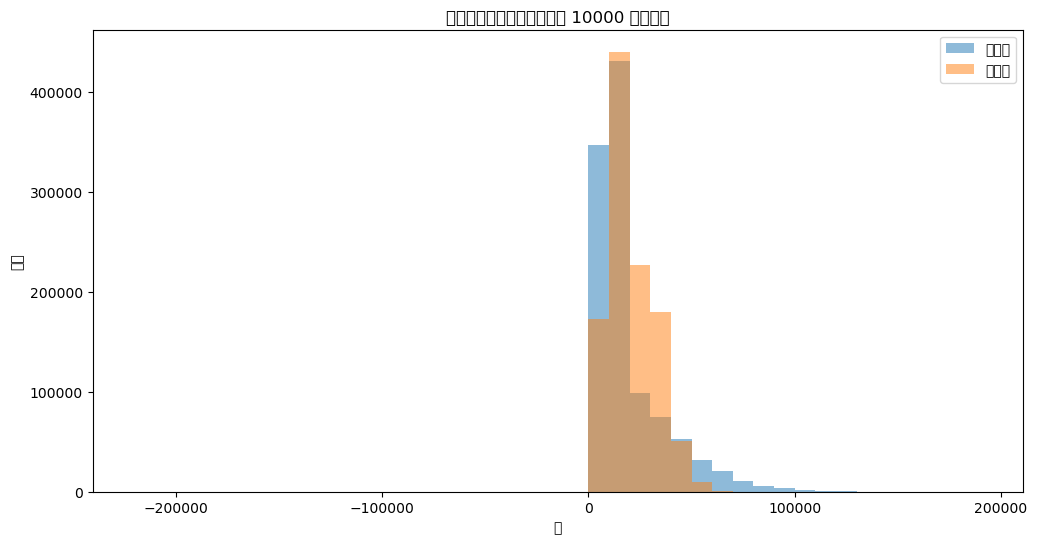

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 展平真实值与预测值数组
flatten_real = real_array.flatten()
flatten_pred = pred_array.flatten()

# 计算最小值和最大值，确定分箱范围
min_value = min(np.min(flatten_real), np.min(flatten_pred))
max_value = max(np.max(flatten_real), np.max(flatten_pred))

# 以 10000 为单位创建分箱
bins = np.arange(
    int(min_value // 10000) * 10000,
    int((max_value // 10000 + 1) * 10000) + 10000,
    10000,
)

# 绘制真实值的直方图
plt.figure(figsize=(12, 6))
plt.hist(flatten_real, bins=bins, alpha=0.5, label="真实值")
plt.hist(flatten_pred, bins=bins, alpha=0.5, label="预测值")

# 设置图表标题和坐标轴标签
plt.title("真实值与预测值的分布（以 10000 为单位）")
plt.xlabel("值")
plt.ylabel("频数")
plt.legend()

# 显示图表
plt.show()

In [ ]:
# 分别查看真实值和预测值的最大值与最小值
print("真实值的最大值：", np.max(filtered_real_array))
print("真实值的最小值：", np.min(filtered_real_array))
print("预测值的最大值：", np.max(filtered_pred_array))
print("预测值的最小值：", np.min(filtered_pred_array))
# 以1000为单位，显示真实值与预测值的分布
import matplotlib.pyplot as plt

# 假设 real_array 和 pred_array 是真实值和预测值的数组
# 假设每个数组的长度为 24

真实值的最大值： 131225.0
真实值的最小值： 5510.0
预测值的最大值： 169629.0
预测值的最小值： 28.202286


In [ ]:
all_values = np.concatenate([real_array.flatten(), pred_array.flatten()])
y_min = np.min(all_values)
y_max = np.max(all_values)
print(f"y_min: {y_min}, y_max: {y_max}")

y_min: -213611.14, y_max: 185149.56


In [ ]:
from Loss.PearsonMSELoss import pearson_mse_loss_xgb_test
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize index
current_index = 0


def visualize_predictions(
    real_array,
    pred_array,
    loss_function=pearson_mse_loss_xgb_test,
    loss_min_threshold=None,  # 新增参数，筛选损失大于该值的样本
    loss_max_threshold=None,
):
    global current_index
    # 计算每个样本的损失值
    sample_losses = [
        loss_function(real_array[i], pred_array[i]) for i in range(len(real_array))
    ]

    if loss_min_threshold is not None or loss_max_threshold is not None:
        # 筛选出损失值在指定阈值范围内的样本索引
        valid_indices = []
        for i, loss in enumerate(sample_losses):
            if (loss_min_threshold is None or loss >= loss_min_threshold) and (
                loss_max_threshold is None or loss < loss_max_threshold
            ):
                valid_indices.append(i)
        if not valid_indices:
            if loss_min_threshold is not None and loss_max_threshold is not None:
                print(
                    f"没有损失值在 {loss_min_threshold} 到 {loss_max_threshold} 之间的样本。"
                )
            elif loss_min_threshold is not None:
                print(f"没有损失值大于 {loss_min_threshold} 的样本。")
            else:
                print(f"没有损失值小于 {loss_max_threshold} 的样本。")
            return
    else:
        # 若阈值为 None，则不筛选，使用所有样本索引
        valid_indices = list(range(len(real_array)))

    n_samples = len(valid_indices)

    def show_sample(index):
        if 0 <= index < n_samples:
            actual_index = valid_indices[index]
            # Calculate loss value
            loss = loss_function(real_array[actual_index], pred_array[actual_index])
            # Clear previous plot output
            clear_output(wait=True)
            # Plot comparison image
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(real_array[actual_index], label="Real Values")
            ax.plot(pred_array[actual_index], label="Predicted Values")
            ax.set_title(f"Sample {actual_index} - Loss: {loss:.4f}")
            ax.set_xlabel("Time Step")
            ax.set_ylabel("Value")
            ax.legend()

            # 设置 y 轴最大值为 20000，最小值为 0
            ax.set_ylim(5000, 15000)
            # 设置 y 轴间隔为 1000
            y_ticks = range(5000, 15001, 1000)
            ax.set_yticks(y_ticks)

            print(f"sample {actual_index} Loss: {loss}")
            plt.show()
            # Redisplay buttons
            display(button_box)
            display(jump_box)
        else:
            print("The input index is out of range. Please select again.")

    def next_sample(b):
        global current_index
        if current_index < n_samples - 1:
            current_index += 1
        show_sample(current_index)

    def prev_sample(b):
        global current_index
        if current_index > 0:
            current_index -= 1
        show_sample(current_index)

    def jump_to_sample(b):
        global current_index
        try:
            input_index = int(jump_input.value)
            if input_index in valid_indices:
                current_index = valid_indices.index(input_index)
                show_sample(current_index)
            else:
                print(f"样本编号 {input_index} 不在有效范围内或不符合损失阈值要求。")
        except ValueError:
            print("请输入有效的整数样本编号。")

    # Create buttons
    next_button = widgets.Button(description="Next Sample")
    prev_button = widgets.Button(description="Previous Sample")

    # Bind button click events
    next_button.on_click(next_sample)
    prev_button.on_click(prev_sample)

    # Create a box to hold buttons
    button_box = widgets.HBox([prev_button, next_button])

    # Create jump input and button
    jump_input = widgets.IntText(description="样本编号:")
    jump_button = widgets.Button(description="跳转")
    jump_button.on_click(jump_to_sample)
    jump_box = widgets.HBox([jump_input, jump_button])

    # Show the initial sample and buttons
    show_sample(current_index)

sample 361 Loss: 3004219.770757975


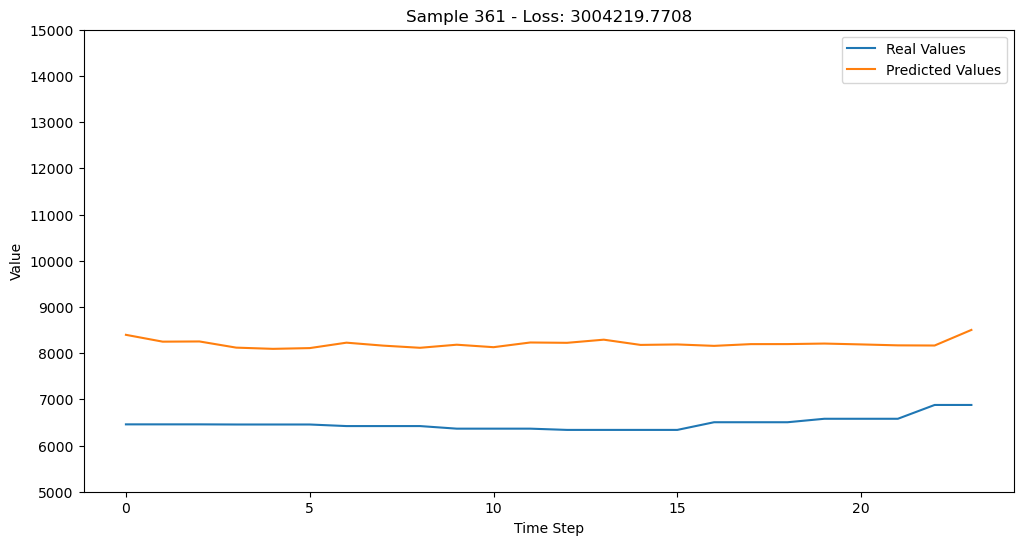

In [ ]:
# Call the function, replace real_array and pred_array with actual data
# 示例调用，可根据需要传入损失最小值和最大值阈值
visualize_predictions(
    filtered_real_array,
    filtered_pred_array,
    loss_min_threshold=3000000,
    loss_max_threshold=3100000,
)